# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

>We will try to find out historical data on etherium volume from January 1st 2020 to June 30th 2021. After that, we will analyze the trend of the daily volume movement of **Etherium**.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [68]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [69]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [70]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

We will look for the right key to determine what data to pull. Using `find` to get where the table is located

In [71]:
table = soup.find('table',attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


>From the results above, we can conclude that the table containing the daily data of ethereum is wrapped within the `<table>` class.

>Next, we have to determine the number of rows. This number of rows will later be used to look up all other rows with the same key we're looking for.

In [72]:
row = soup.find_all('th',attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length # --> the total number of rows in the table

547

In [73]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #finding all Dates in table
    Date = soup.find_all('th',attrs={'class':'font-semibold text-center'})[i].text
    Date = Date.strip('\n')
    
    # finding all Volume in table
    Volume = soup.find_all('td',attrs={'class':'text-center'})[i*4+1].text
    Volume = Volume.strip('\n')
    
    #append the data that has been obtained, into an array.
    temp.append((Date, Volume))
    
#reverse the order of the list
temp = temp[::-1]

>Next, we have to define the right column to retrieve the volume data. Since there is no specific tag >for the column of data we want, we can specify the header column as the column marker that we will >retrieve.

## Creating data frame & Data wrangling

Next, we put the array into dataframe

In [77]:
import pandas as pd

df = pd.DataFrame(temp,columns=('Date', 'Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


>Before analyzing it further, we need to adjust the data type to make it easier to process. We can see that the type of each data is not correct. Both of the data contains object type, which is not suitable for further analisys.

In [78]:
#change to datetime64 type
df['Date'] = df['Date'].astype('datetime64')

#cleaning the data so we can analyze much better
df['Volume'] = df['Volume'].str.replace('$','')
df['Volume'] = df['Volume'].str.replace(',','')

#change to int64 type
df['Volume'] = df['Volume'].astype('float64')

df.dtypes

C:\Users\vincent\AppData\Local\Temp/ipykernel_12124/1819131255.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace('$','')


Date      datetime64[ns]
Volume           float64
dtype: object

>With the right data type, it will be easier for us to carry out further analysis processes. Next, we define the Date column as index to make it easier to visualize.

In [79]:
df = df.set_index('Date')

>The data that has been tidied up is then plotted in order to produce a time series graph. From this graph we can see more insight from the pieces of data we previously processed

<AxesSubplot:title={'center':'Ethereum Daily Trading Volume'}, xlabel='Jan 2020 - June 2021', ylabel='Volume'>

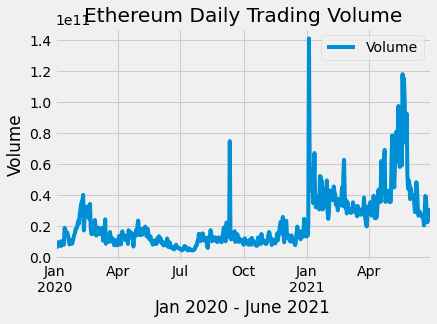

In [83]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot(
        xlabel = 'Jan 2020 - June 2021',
        ylabel = 'Volume',
        title = "Ethereum Daily Trading Volume"
)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Ethereum Daily Trading Volume'}, xlabel='Jan 2020 - June 2021', ylabel='Volume'>

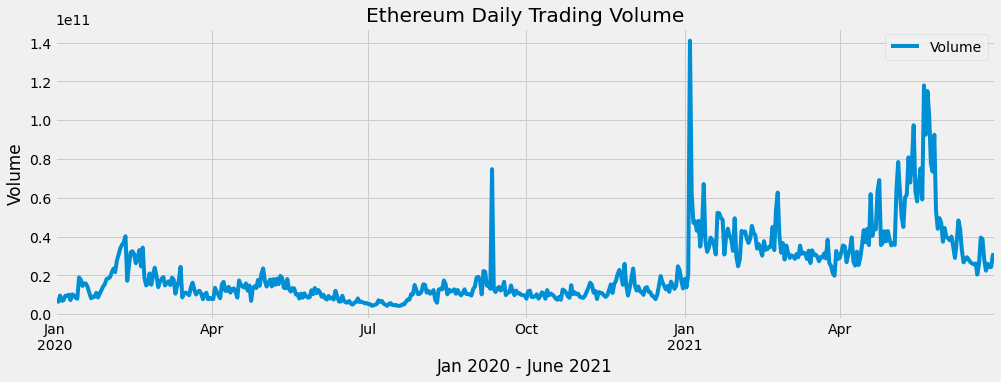

In [84]:
df.plot(xlabel = 'Jan 2020 - June 2021', ylabel = 'Volume', title = "Ethereum Daily Trading Volume", figsize=(15,5))

>**1. The highest ethereum volume took place in January 2021.**  
>**2. Ethereum volume increased in the first quarter of 2021 compared to the same period in 2020.**  
>**3. Looking at the historical trend, there is a possibility that ethereum volume will increase again in September 2021**

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.